# GoogLeNet Inception Block

In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, concatenate
from tensorflow.keras.utils import plot_model

We define the inception_block function that represents a single inception block in the GoogleNet architecture. It takes an input tensor inputs and a list of filter sizes filters as arguments. The function creates four branches, each with a different convolutional configuration, and then concatenates the outputs of these branches. The output of the function is the concatenated tensor.

In [2]:
def inception_block(inputs, filters):
    tower_1 = Conv2D(filters[0], (1, 1), padding='same', activation='relu')(inputs)
    
    tower_2 = Conv2D(filters[1], (1, 1), padding='same', activation='relu')(inputs)
    tower_2 = Conv2D(filters[2], (3, 3), padding='same', activation='relu')(tower_2)
    
    tower_3 = Conv2D(filters[3], (1, 1), padding='same', activation='relu')(inputs)
    tower_3 = Conv2D(filters[4], (5, 5), padding='same', activation='relu')(tower_3)
    
    tower_4 = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(inputs)
    tower_4 = Conv2D(filters[5], (1, 1), padding='same', activation='relu')(tower_4)
    
    output = concatenate([tower_1, tower_2, tower_3, tower_4], axis=3)
    
    return output

In [3]:
# Input shape
input_shape = (224, 224, 3)

# Input layer
inputs = Input(shape=input_shape)

# Inception block
x = inception_block(inputs, filters=[64, 96, 128, 16, 32, 32])

# Create model
model = Model(inputs, x)

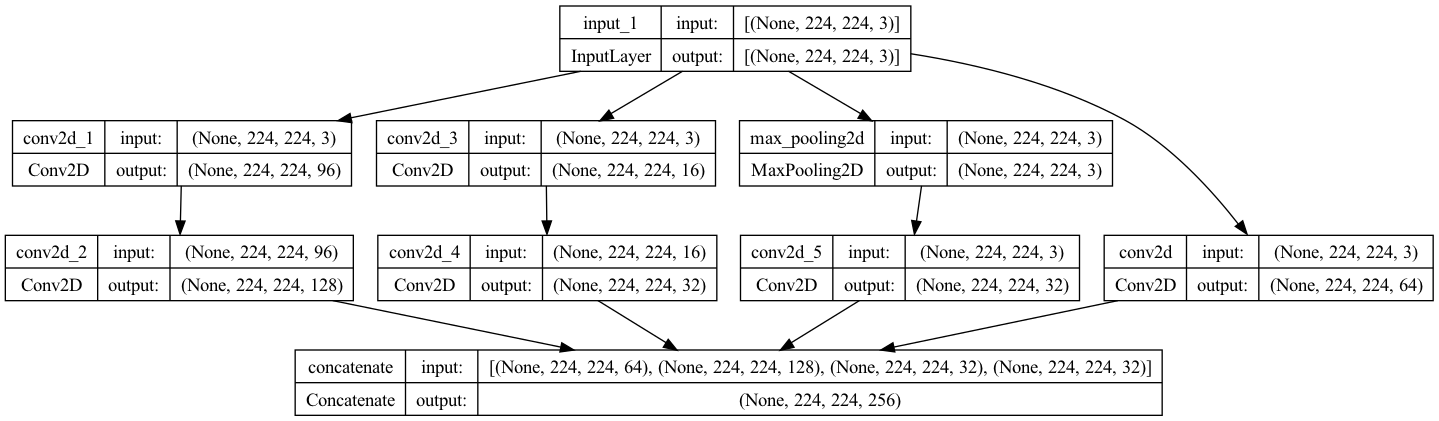

In [4]:
plot_model(model,show_shapes = True, show_layer_names = True)

In [5]:
# Display model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_1 (Conv2D)           (None, 224, 224, 96)         384       ['input_1[0][0]']             
                                                                                                  
 conv2d_3 (Conv2D)           (None, 224, 224, 16)         64        ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 224, 224, 3)          0         ['input_1[0][0]']             
 D)                                                                                           